### Question 1

In [7]:
# Part 1 :Train the model sklearn.tree.DecisionTreeClassifier with random_state=0 and compute the scores on the training and test sets.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)

print("Train: {}; Test: {}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Train: 1.0; Test: 0.8811188811188811


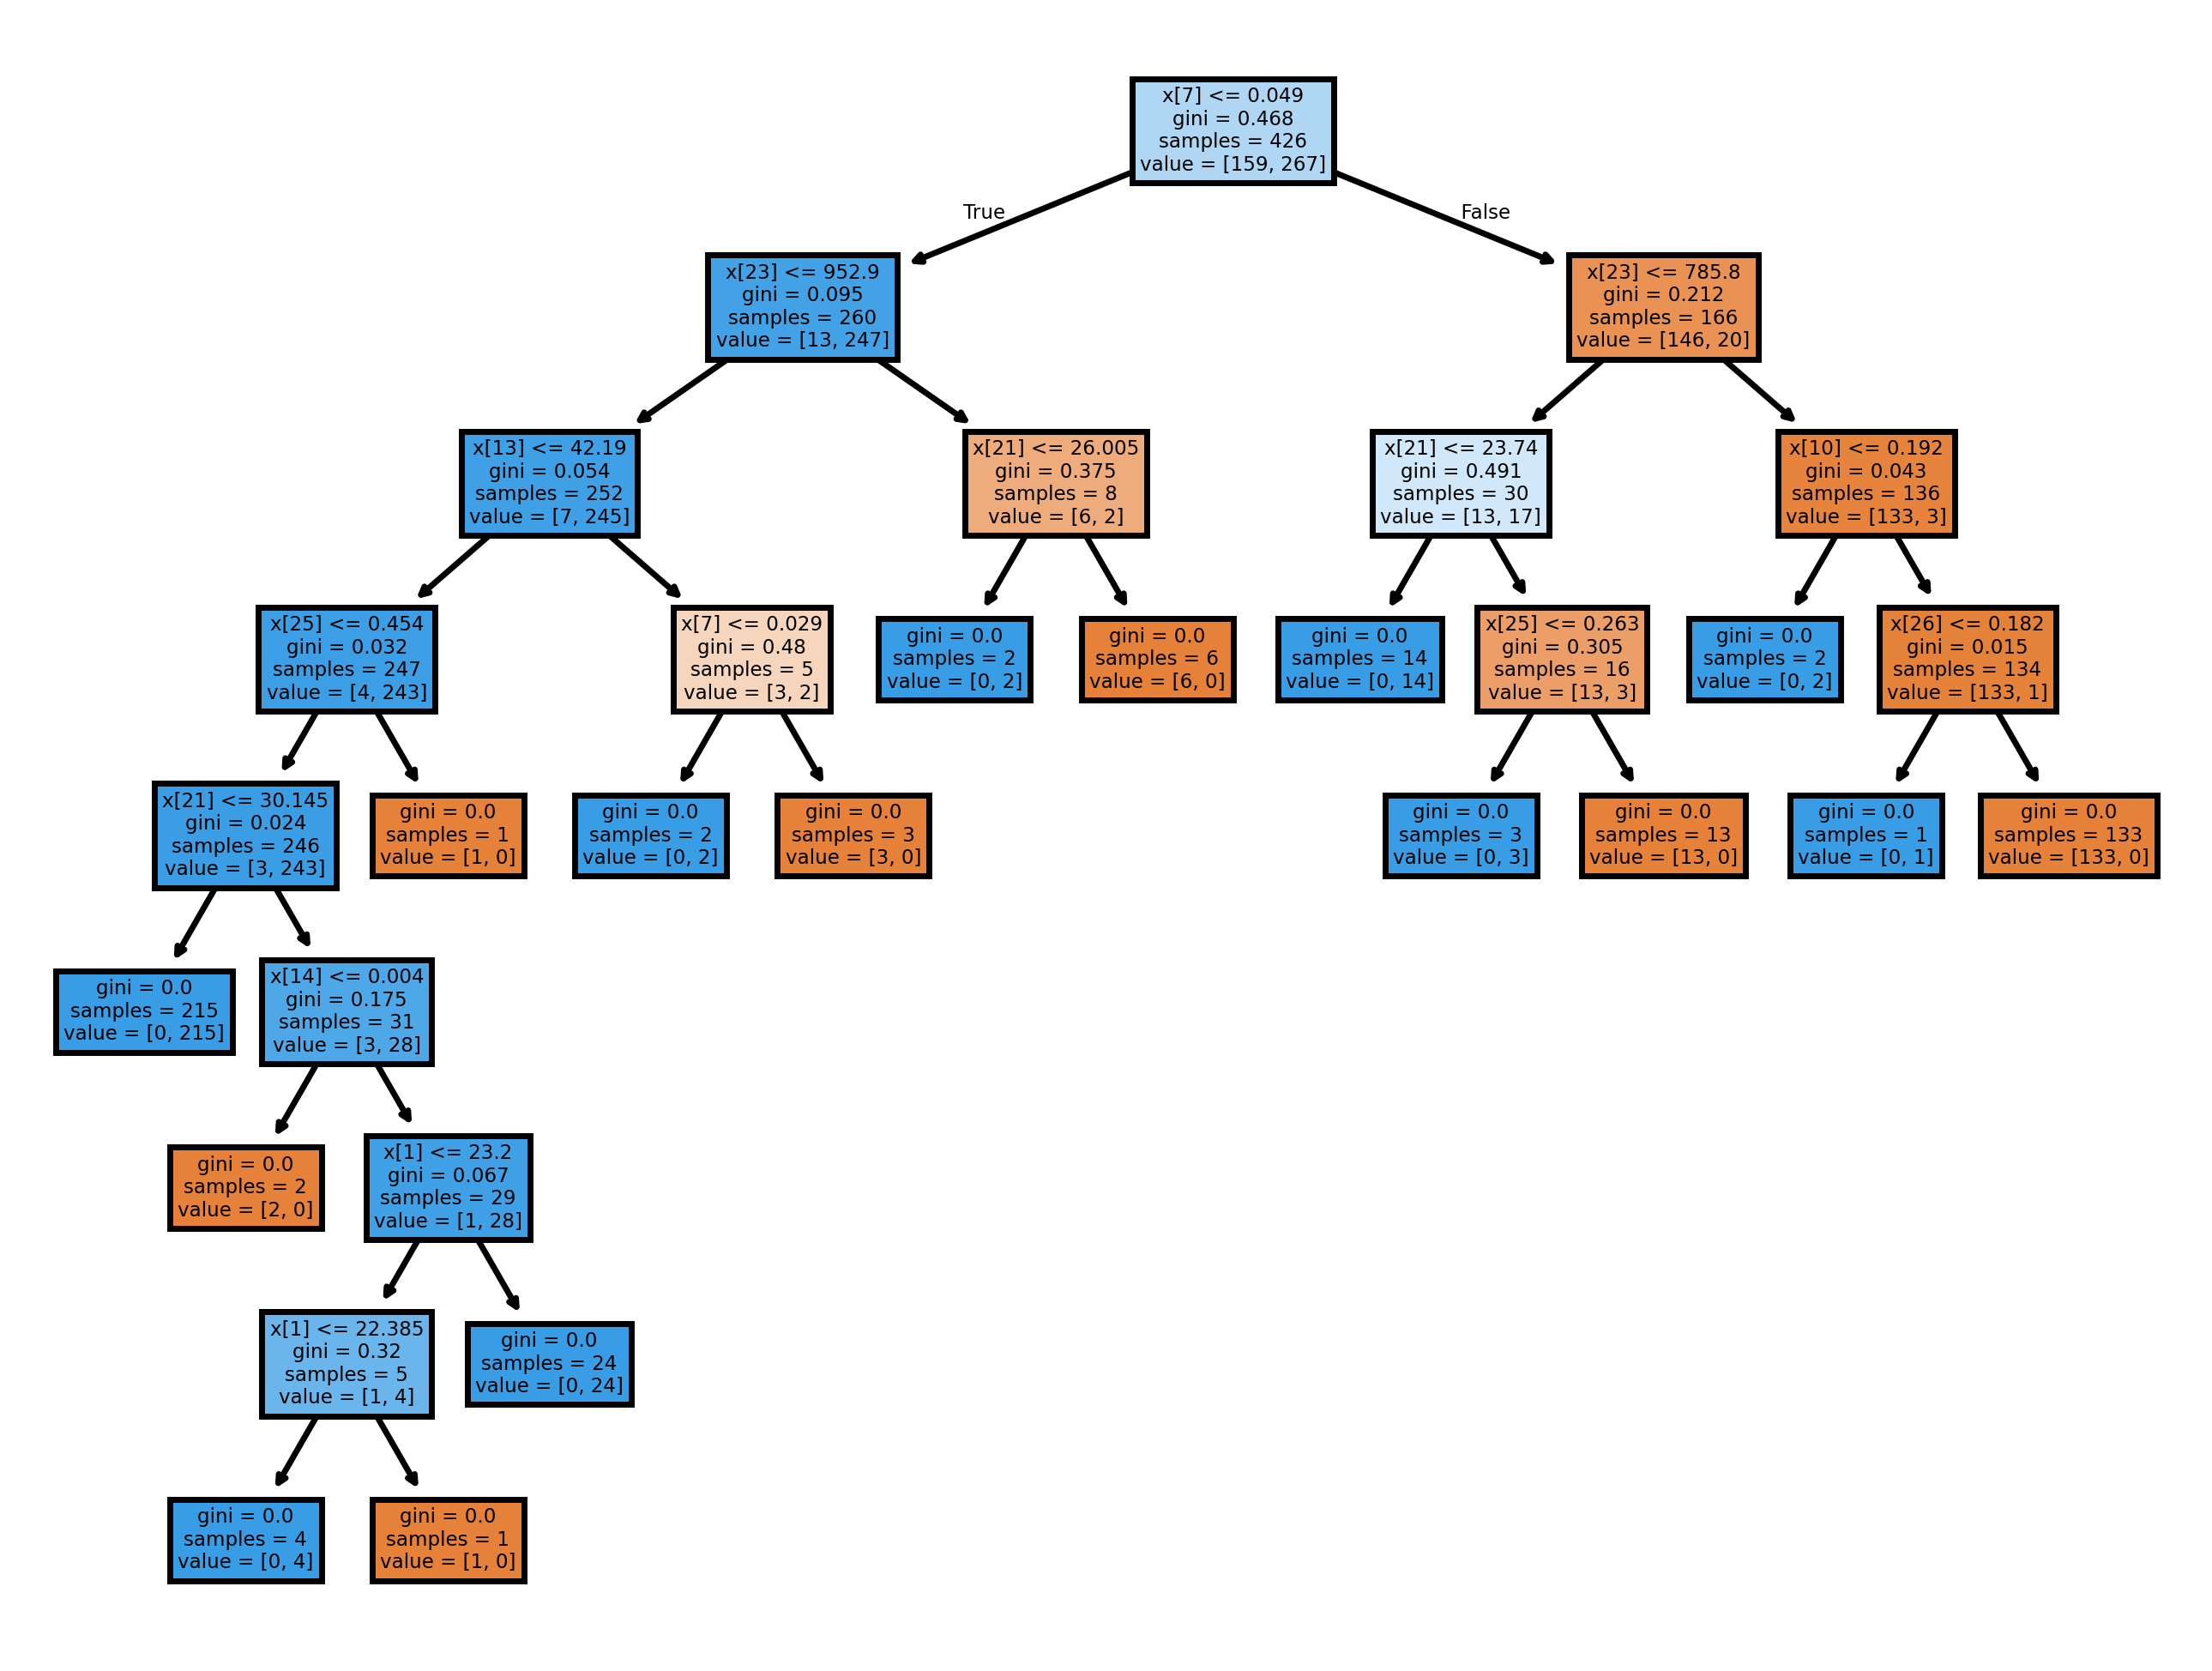

In [8]:
# Part 2 : visualise the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=500) #parameters: figsize, dpi
plot_tree(clf, filled = True) #parameters: filled, class_names, feature_names
plt.show()

Train: 0.9765258215962441; Test: 0.9370629370629371


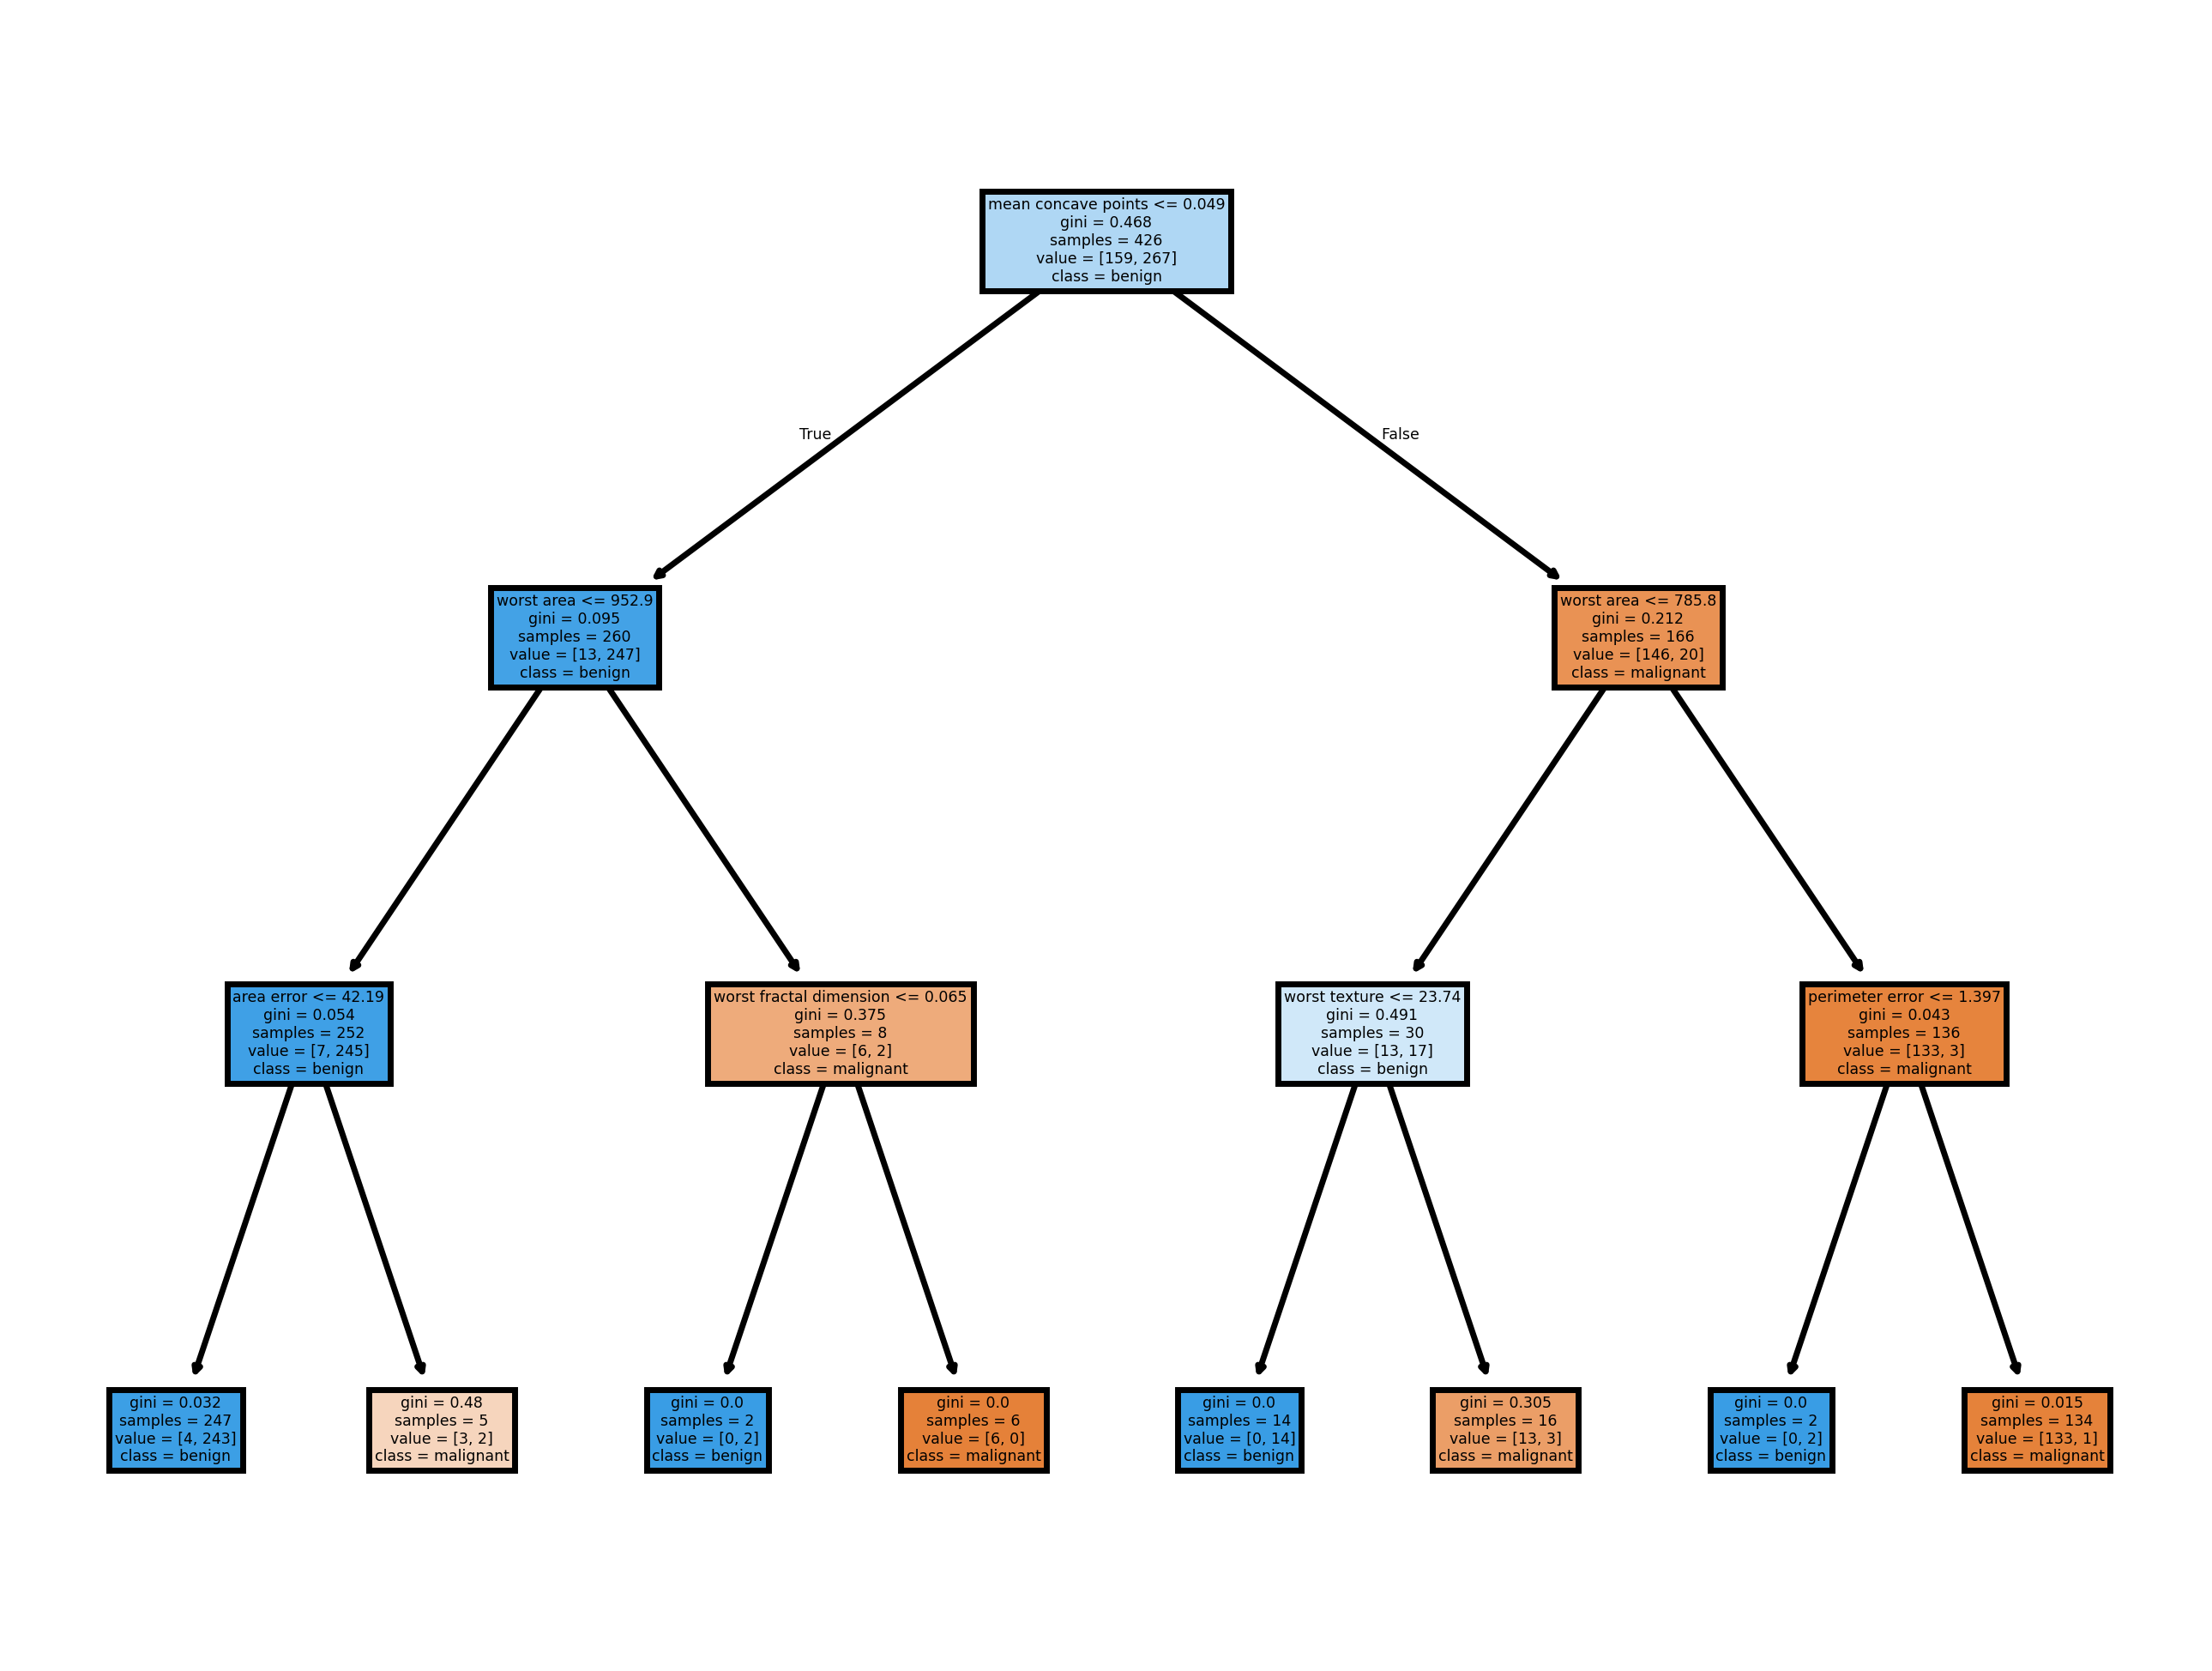

In [9]:
# Part 3 : Repeat the previous steps (score and visualization), with a maximum depth of 3(max_depth=3). What do you observe? What happens if you change the value of the min_samples_leaf or min_samples_split?
clf = DecisionTreeClassifier(random_state = 0, max_depth=3)
clf.fit(X_train, y_train)

print("Train: {}; Test: {}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

plt.figure(dpi=500) #parameters: figsize, dpi
plot_tree(clf, filled = True,
class_names = cancer.target_names,
feature_names = cancer.feature_names) #parameters: filled, class_names, feature_names
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [2, 3, 4, 5, 6],
    'min_samples_leaf' : [3, 5, 7, 9, 11],
    'min_samples_split' : [6, 7, 8, 9, 10, 11, 12]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=0),params)
gridSearch.fit(X_train, y_train)
print("Best params : ", gridSearch.best_params_)

print("Train: {}; Test: {}".format(gridSearch.score(X_train, y_train), gridSearch.score(X_test, y_test)))

Best params :  {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 7}
Train: 0.9835680751173709; Test: 0.9020979020979021


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [11]:
gridSearch.cv_results_["rank_test_score"]

array([134, 134, 134, 134, 134, 134, 134, 141, 141, 141, 141, 141, 141,
       141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141,
       141, 141, 162, 162, 162, 162, 162, 162, 162,  36,  36,  36,  57,
        57,  57,  57, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 113, 113, 113, 113, 113, 113, 113,  41,  41,
        41,  41,  41,  41,  41,  14,  39,  39,  48,  57,  57,  57, 169,
       169, 169, 169, 169, 169, 169,  71,  71,  71,  71,  71,  71,  71,
        71,  71,  71,  71,  71,  71,  71,  15,  15,  15,  15,  15,  15,
        15,   9,   1,   1,   3,   3,   3,   3,  52,  52,  52,  52,  52,
        48,  48,  71,  71,  71,  71,  71,  71,  71,  71,  71,  71,  71,
        71,  71,  71,  15,  15,  15,  15,  15,  15,  15,  51,   8,   3,
        10,  10,  10,  10,  64,  64,  64,  64,  64,  64,  64,  71,  71,
        71,  71,  71,  71,  71,  71,  71,  71,  71,  71,  71,  71,  15,
        15,  15,  15,  15,  15,  15], dtype=int32)

In [12]:
# Part 4 : Instead of looking at the tree, which can be a bit difficult, we can consider other properties, such as feature importance in the decision taken by the tree: from 0 meaning “not used” to 1 meaning 
# “perfectly predicts the class”. The sum of feature importances sums to 1. Observe these values with:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.76534   , 0.        , 0.        ,
       0.        , 0.        , 0.02131182, 0.01833724, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05411334, 0.        , 0.12443031, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01646729])

(-1.0, 30.0)

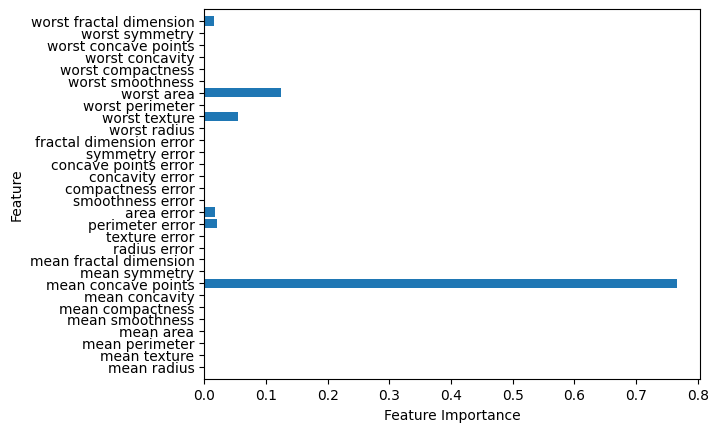

In [13]:
# Part 5 : Visualize feature importance with the following code.
import numpy as np

n_features = cancer.data.shape[1]
plt.barh(range(n_features), clf.feature_importances_,
align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

In [14]:
# Part 6 : In order to be able to visualize the decision boundary (in 2 dimensions), build a new decision tree model based on the 2 most important features identified previously. Draw the decision boundaries for
#  trees with depth 2 to 6.

index = np.argsort(clf.feature_importances_)
index
print(cancer.feature_names[index[-1]])
print(cancer.feature_names[index[-2]])

mean concave points
worst area


[Text(0.49107142857142855, 0.9285714285714286, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.19642857142857142, 0.7857142857142857, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(0.34375, 0.8571428571428572, 'True  '),
 Text(0.07142857142857142, 0.6428571428571429, 'worst concave points <= 0.071\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(0.03571428571428571, 0.5, 'gini = 0.0\nsamples = 128\nvalue = [0, 128]'),
 Text(0.10714285714285714, 0.5, 'worst concave points <= 0.072\ngini = 0.018\nsamples = 112\nvalue = [1, 111]'),
 Text(0.07142857142857142, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14285714285714285, 0.35714285714285715, 'gini = 0.0\nsamples = 111\nvalue = [0, 111]'),
 Text(0.32142857142857145, 0.6428571428571429, 'worst concave points <= 0.158\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.25, 0.5, 'worst concave points <= 0.138\ngini = 0.444\nsa

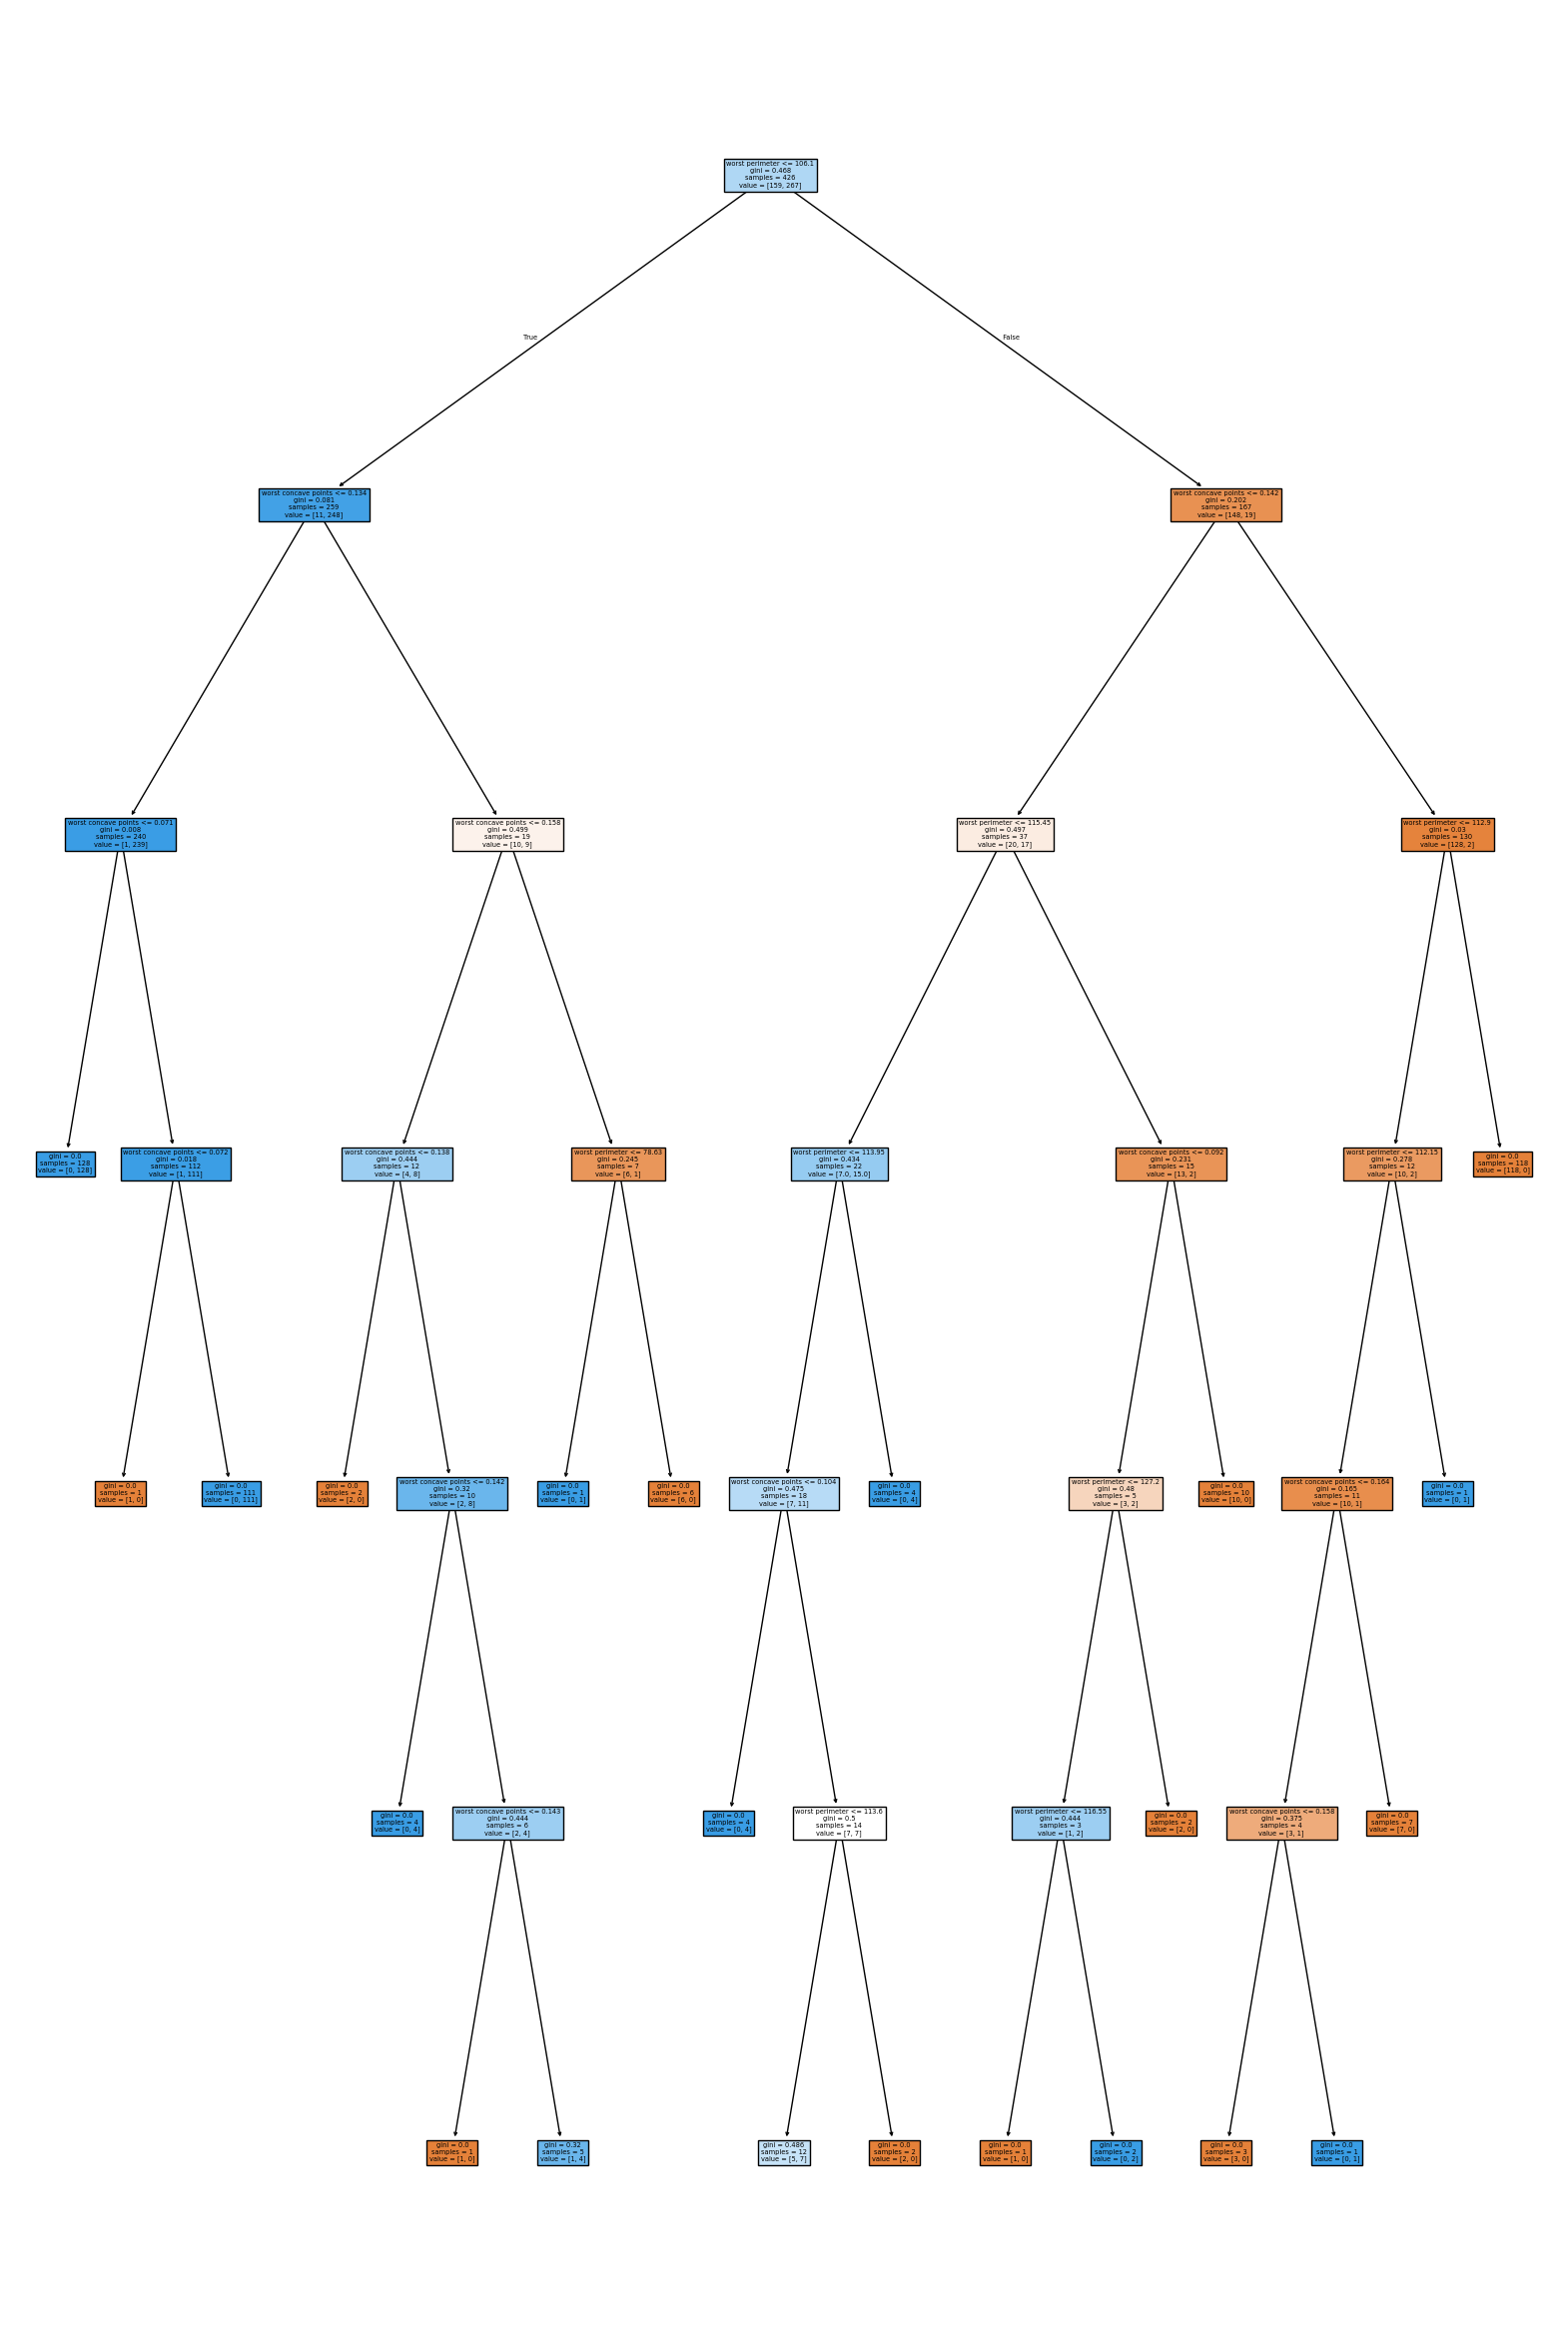

In [15]:
from sklearn.inspection import DecisionBoundaryDisplay
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data[:, [22,27]], cancer.target, random_state = 0, stratify = cancer.target
)

clf = DecisionTreeClassifier(random_state= 0, max_depth= 6)
clf.fit(X_train, y_train)
plt.figure(figsize=(20,30))
plot_tree(clf, filled=True, feature_names=cancer.feature_names[[22,27]])



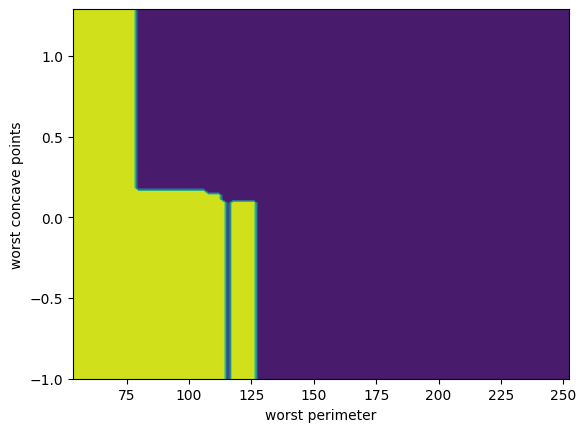

In [16]:
DecisionBoundaryDisplay.from_estimator(clf, X_train, response_method="predict",
xlabel = cancer.feature_names[22],
ylabel = cancer.feature_names[27])

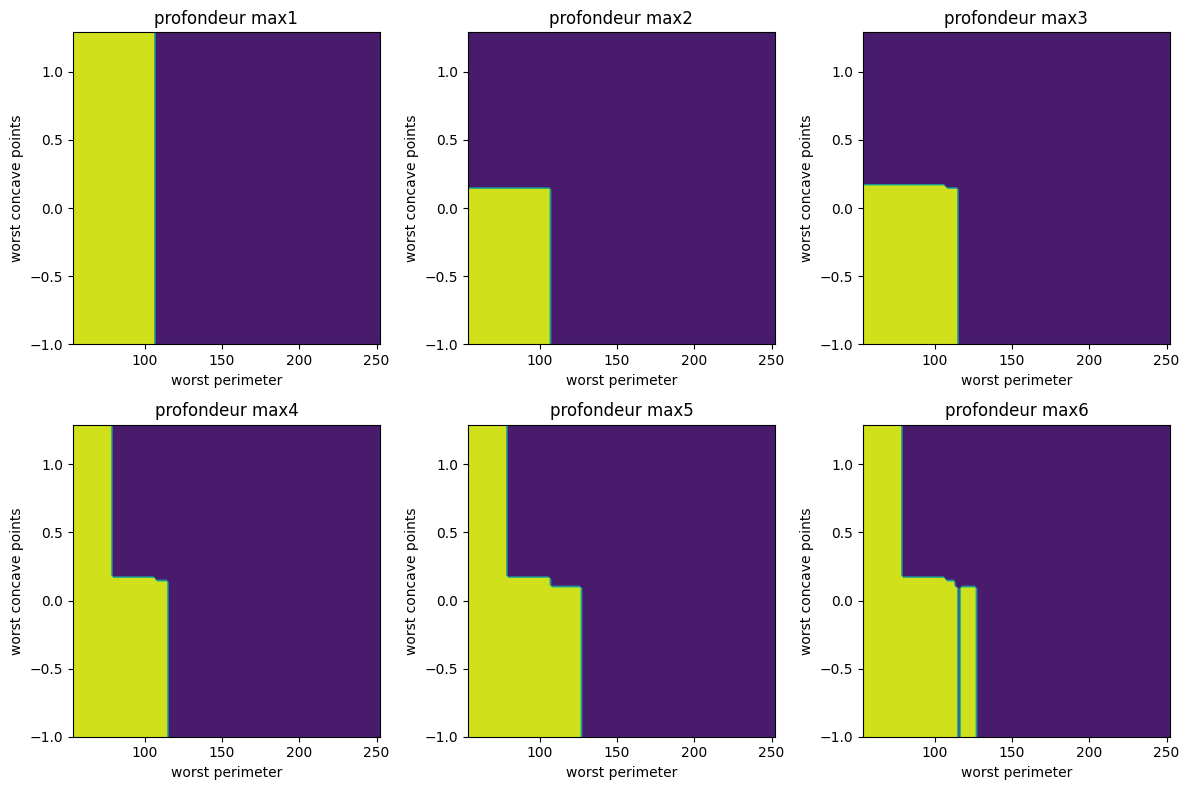

In [17]:
fig, sub = plt.subplots(2, 3, figsize = (12,8))
D = range(1,7)
for d, ax in zip(D, sub.flatten()) :
    clf = DecisionTreeClassifier(random_state= 0, max_depth= d)
    clf.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(clf, X_train, response_method="predict",
                                                xlabel = cancer.feature_names[22],
                                                ylabel = cancer.feature_names[27],
                                                ax = ax)
    ax.set_title('profondeur max' + str(d))
plt.tight_layout()
plt.show()


### Question 2 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
clf = RandomForestClassifier(random_state=0)  # Default n_estimators=100
clf.fit(X_train, y_train)
print("Train: {}; Test: {}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))


Train: 0.9976525821596244; Test: 0.9440559440559441


In [20]:
# part 2
clf.feature_importances_

array([0.02969122, 0.01727804, 0.06929807, 0.04112995, 0.00500449,
       0.00636883, 0.08056202, 0.09200666, 0.00425598, 0.00429626,
       0.02136349, 0.00420529, 0.01354811, 0.02303752, 0.00288949,
       0.00593161, 0.00468708, 0.0027883 , 0.003081  , 0.00203185,
       0.12542246, 0.01704882, 0.19562572, 0.0743788 , 0.00957487,
       0.0086519 , 0.02172119, 0.10142766, 0.00399358, 0.00869974])